<a href="https://colab.research.google.com/github/AnaMartaSilva/Data-Mining-Project/blob/master/Project_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project
## Mask detection

Group members:
- Lorenzo Pigozzi	--- m20200745
- Marta
- Gustavo
- Salim




# New Section

### Steps
1.	Importing data and libraries  
2.	Brief data preprocessing       
3.	Model architecture 
4.  Model assessment      
5.  Deployment

### 1. Importing data and libraries <a class="anchor" id="1"></a>

In [27]:
# importing needed libraries
%tensorflow_version 1.x
import tensorflow
import pandas as pd
import numpy as np
import keras
import os, shutil
import io


# keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import callbacks 

# sklearn
from sklearn.metrics import classification_report, confusion_matrix

# matplotlib
import matplotlib.pyplot as plt

In [28]:

# for downloading the pictures
from google.colab import drive
drive.mount('/content/gdrive')
!ls '/content/gdrive'  # take a look at the Google Drive content

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
MyDrive


In [29]:
######## defining the paths
original_masks = "gdrive/MyDrive/Project Deeplearning/Pics_with_masks/withMaskDataset/withMaskDataset/"
original_faces = "gdrive/MyDrive/Project Deeplearning/Images/"

In [30]:
# import os
# !ls /content/gdrive/MyDrive/Project_Deeplearning
base_dir = 'gdrive/MyDrive/Project Deeplearning/'

# creationof the folder
# os.mkdir(train_dir)
# setting the direction of the train
train_dir = os.path.join(base_dir, 'train')

# creationof the folder
# os.mkdir(validation_dir)
# setting the direction of the train
validation_dir=os.path.join(base_dir, 'validation')

# creationof the folder
# os.mkdir(test_dir)
# setting the direction of the train
test_dir=os.path.join(base_dir, 'test')

In [31]:
train_masks_dir=os.path.join(train_dir, 'masks')
# os.mkdir(train_masks_dir)
train_no_masks_dir=os.path.join(train_dir, 'no_masks')
# os.mkdir(train_no_masks_dir)

validation_masks_dir=os.path.join(validation_dir, 'masks')
# os.mkdir(validation_masks_dir)
validation_no_masks_dir=os.path.join(validation_dir, 'no_masks')
# os.mkdir(validation_no_masks_dir)

test_masks_dir=os.path.join(test_dir, 'masks')
# os.mkdir(test_masks_dir)
test_no_masks_dir=os.path.join(test_dir, 'no_masks')
# os.mkdir(test_no_masks_dir)

In [ ]:
## Train = 70, Val 20, Test 10

#fnames = ['Image{}.jpg'.format(i) for i in range(0,990)]
#for fname in fnames:
#  src=os.path.join(original_masks, fname)
#  dst=os.path.join(train_masks_dir, fname)
#  shutil.copyfile(src,dst)

# fnames = ['Image{}.jpg'.format(i) for i in range(990,1273)]
# for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(validation_masks_dir, fname)
#   shutil.copyfile(src,dst)

# fnames = ['Image{}.jpg'.format(i) for i in range(1273,1415)]
# for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(test_masks_dir, fname)
#   shutil.copyfile(src,dst)



# fnames = ['Image_Faces{}.jpg'.format(i) for i in range(0,990)]
# for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(train_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

# fnames = ['Image_Faces{}.jpg'.format(i) for i in range(990,1273)]
# for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(validation_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

# fnames = ['Image_Faces{}.jpg'.format(i) for i in range(1273,1415)]
# for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(test_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

### 2 Brief data preprocessing 

In [32]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
# Hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [33]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [34]:
# visualizing the model structure
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                984096    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 985,025
Trainable params: 985,025
Non-trainable params: 0
_________________________________________________________________


In [35]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [36]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Project Deeplearning/train',
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('/content/gdrive/MyDrive/Project Deeplearning/validation', 
                                                        target_size = (64, 64),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Project Deeplearning/test',
                                            target_size = (64, 64),
                                            batch_size = 20,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1980 images belonging to 2 classes.
Found 566 images belonging to 2 classes.
Found 284 images belonging to 2 classes.


# Problem :
we have to solve the problem of the fitting phase.
error raising with the method fit_generator, probably issue with reading image from validation set.
Erro r: " UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fbac2e8c830> "

In [ ]:
# fitting the model
Epochs = 2

#hist=model.fit_generator(training_set,
#                         steps_per_epoch = 99,
#                         epochs = 1,
#                         validation_data = validation_set,
#                         validation_steps = 28)


hist=model.fit_generator(training_set,
                         validation_data = validation_set,
                         epochs=Epochs,
                         steps_per_epoch = len(validation_set))

Epoch 1/2
28/29 [===========================>..] - ETA: 5s - loss: 0.5731 - accuracy: 0.7179 

In [ ]:
# possible solution to solve the problem above

#from io import BytesIO
#BytesIO(b"0x7fbac83f9350")

In [ ]:
# # checking the information of the batch we split
# # checking if it makes sense with the size of the images

# batchX, batchy = train_iterator.next()
# print('Train Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = validation_iterator.next()
# print('Validation Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = test_iterator.next()
# print('Test Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [39]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, 15)    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)



# if you have the last version of tensorflow, the predict_generator is deprecated.
# you should use the predict method.
# if you do not have the last version, you must use predict_generator

In [40]:
Y_pred.shape

(284, 1)

## Prediction assessment

In [41]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[ 25 117]
 [ 11 131]]


In [42]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.69      0.18      0.28       142
        Mask       0.53      0.92      0.67       142

    accuracy                           0.55       284
   macro avg       0.61      0.55      0.48       284
weighted avg       0.61      0.55      0.48       284



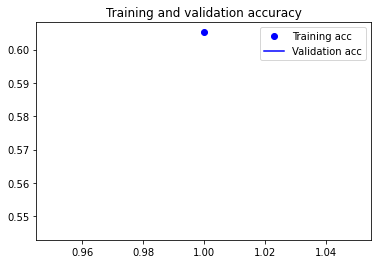

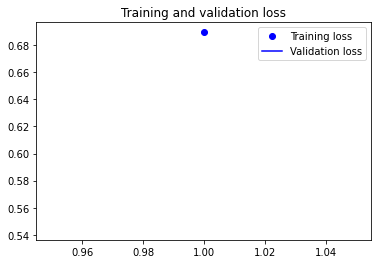

In [43]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Next Steps : improving the NN

In [ ]:
### Code for DATA AUGMENTATION

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# test set only rescaled
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Set callbacks to analyze the best number of epochs | Try 25,50, and 100

  earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                          mode ="min", patience = 5,  
                                          restore_best_weights = True) 
  
  history = model.fit(partial_images, partial_labels, batch_size = 128,  
                      epochs = 25, validation_data =(X_val, y_val),  
                      callbacks =[earlystopping]) 

In [ ]:
# Train the model for XXXXXX epochs
#model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=XXXXXXX)

In [ ]:
# Evaluate the model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

### 4. Model assessment

### 5. Deployment

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 5.4MB/s 


Example
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Problems websites

https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

https://github.com/python-pillow/Pillow/issues/1006